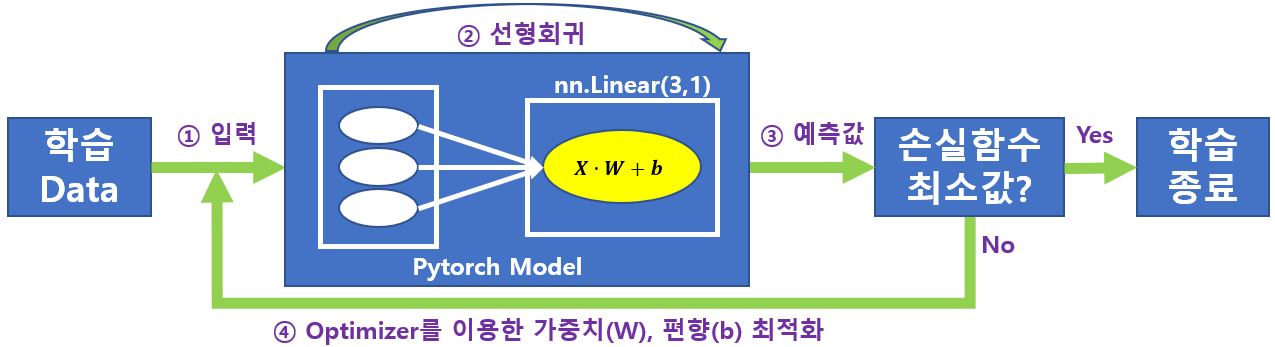

# 1.학습 Data 정의

## 1.1.load by Numpy

In [ ]:
import numpy as np
import torch

# read file
loaded_txt = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/NeoWizard(박성호)-Pytorch/data/LEC06_TrainData.csv',
                        delimiter=',')
print(loaded_txt.shape) # (15, 4)
print(loaded_txt[:5])

# training data
x_train_np = loaded_txt[:, :-1] # 모든 row, 1~3 col(마지막 열 앞까지)
print(x_train_np[:5])
# 정답 data
y_train_np = loaded_txt[:, -1:] # 모든 row, 4 col(마지막 col 부터 전부)
print(y_train_np[:5])

# Numpy.ndarray => Pytorch.Tensor
x_train = torch.Tensor(x_train_np)
print(x_train[:5])

y_train = torch.Tensor(y_train_np)
print(y_train[:5])

(15, 4)
[[ 1.  2.  0. -4.]
 [ 5.  4.  3.  4.]
 [ 1.  2. -1. -6.]
 [ 3.  1.  0.  3.]
 [ 2.  4.  2. -4.]]
[[ 1.  2.  0.]
 [ 5.  4.  3.]
 [ 1.  2. -1.]
 [ 3.  1.  0.]
 [ 2.  4.  2.]]
[[-4.]
 [ 4.]
 [-6.]
 [ 3.]
 [-4.]]
tensor([[ 1.,  2.,  0.],
        [ 5.,  4.,  3.],
        [ 1.,  2., -1.],
        [ 3.,  1.,  0.],
        [ 2.,  4.,  2.]])
tensor([[-4.],
        [ 4.],
        [-6.],
        [ 3.],
        [-4.]])


## 1.2.load by Pandas

In [ ]:
import pandas as pd
import torch

loaded_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NeoWizard(박성호)-Pytorch/data/LEC06_TrainData.csv',
                         header=None,
                         names=['x1', 'x2', 'x3', 'y'])
print(loaded_csv.head(5))

# 입력과 정답의 분리
x_train_pd = loaded_csv[['x1', 'x2', 'x3']]
print(x_train_pd.head(5))

y_train_pd = loaded_csv[['y']]
print(y_train_pd.head(5))

# pandas.DataFrame => Numpy.ndarray => Pytorch.Tensor
#               .values           .Tensor()
x_train = torch.Tensor(x_train_pd.values)
print(x_train[:5])

y_train = torch.Tensor(y_train_pd.values)
print(y_train[:5])

print(f'y_train_pd: {type(y_train_pd)}')
print(f'y_train_pd.values: {type(y_train_pd.values)}')

   x1  x2  x3  y
0   1   2   0 -4
1   5   4   3  4
2   1   2  -1 -6
3   3   1   0  3
4   2   4   2 -4
   x1  x2  x3
0   1   2   0
1   5   4   3
2   1   2  -1
3   3   1   0
4   2   4   2
   y
0 -4
1  4
2 -6
3  3
4 -4
tensor([[ 1.,  2.,  0.],
        [ 5.,  4.,  3.],
        [ 1.,  2., -1.],
        [ 3.,  1.,  0.],
        [ 2.,  4.,  2.]])
tensor([[-4.],
        [ 4.],
        [-6.],
        [ 3.],
        [-4.]])
y_train_pd: <class 'pandas.core.frame.DataFrame'>
y_train_pd.values: <class 'numpy.ndarray'>


# 2.Model 정의

In [ ]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
  def __init__(self, input_nodes):
    super().__init__()
    self.linear_stack = nn.Sequential(
        # 입력 data(node) 수: input_nodes
        # 출력 data(node) 수: 1
        nn.Linear(input_nodes, 1)
    )
  def forward(self, x):
    prediction = self.linear_stack(x)
    return prediction

# 3.Model 생성

- [nn.Module](https://www.notion.so/nn-Module-11acebde037680ef9dfcd0acd57db146?pvs=4)

In [ ]:
# 입력 data가 3개인 Linear Regression Mode instance 생성
model = LinearRegressionModel(3)

print("=== named_children() ============================")
# model parameter(Weight, Bias) 확인
# 초기에 임의의 값으로 초기화된 weight와 bias를 학습을 통해 최적의 값을 도출하는 것이 목표
for name, child in model.named_children():
  for param in child.parameters():
    print(f'{name}: {param}')
'''
=== named_children() ============================
linear_stack: Parameter containing:
tensor([[ 0.0538,  0.5266, -0.2279]], requires_grad=True) => 3개의 weight(w1, w2, w3)가 random 값으로 초기화 되어 있다.
linear_stack: Parameter containing:
tensor([0.0308], requires_grad=True)  => 1개의 Bias(b)가 random 값으로 초기화 되어 있다.
'''
print("=== named_modules() ============================")
for name, module in model.named_modules():
  for param in module.parameters():
    print(f'{name}: {param}')
print("=== named_buffer() ============================")
for name, buffer in model.named_buffers():
  print(f'{name}: {buffer}')

=== named_children() ============================
linear_stack: Parameter containing:
tensor([[-0.3690, -0.3883, -0.5324]], requires_grad=True)
linear_stack: Parameter containing:
tensor([0.0411], requires_grad=True)
=== named_modules() ============================
: Parameter containing:
tensor([[-0.3690, -0.3883, -0.5324]], requires_grad=True)
: Parameter containing:
tensor([0.0411], requires_grad=True)
linear_stack: Parameter containing:
tensor([[-0.3690, -0.3883, -0.5324]], requires_grad=True)
linear_stack: Parameter containing:
tensor([0.0411], requires_grad=True)
linear_stack.0: Parameter containing:
tensor([[-0.3690, -0.3883, -0.5324]], requires_grad=True)
linear_stack.0: Parameter containing:
tensor([0.0411], requires_grad=True)
=== named_buffer() ============================


# 4.손실함수/옵티마이져 설정

In [ ]:
import torch.optim as optim

# Linear Regression이므로 평균제곱오차 함수인 nn.MSELoss() 설정
loss_function = nn.MSELoss()
# 확률적 경사하강법(Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=1e-2) # lr=1e-4 로 하니 엉뚱한 값이 나온 경험

# 5.학습

In [ ]:
loss_list = []
epochs = 5000
for epoch in range(epochs):
  model.train()   # training mode

  prediction = model(x_train) # model에 data를 전달하면 자동으로 forward() 호출

  loss = loss_function(prediction, y_train) # 오차 계산

  loss_list.append(loss.item())

  # 오차 역전파(Back-propagation)
  optimizer.zero_grad() # 기울기 초기화
  loss.backward()       # 기울기 계산
  optimizer.step()      # 가중치 upgrade

  if epoch % 100 == 0:
    print(f'epoch = {epoch}, current loss = {loss.item()}')

print(f'epoch = {epoch}, final loss = {loss.item()}')

epoch = 0, current loss = 43.57461166381836
epoch = 100, current loss = 0.16752399504184723
epoch = 200, current loss = 0.0031687275040894747
epoch = 300, current loss = 0.0006516064167954028
epoch = 400, current loss = 0.00021687598200514913
epoch = 500, current loss = 7.325149636017159e-05
epoch = 600, current loss = 2.475012661307119e-05
epoch = 700, current loss = 8.362552762264386e-06
epoch = 800, current loss = 2.8260624276299495e-06
epoch = 900, current loss = 9.554591997584794e-07
epoch = 1000, current loss = 3.231753566979023e-07
epoch = 1100, current loss = 1.0935962535540966e-07
epoch = 1200, current loss = 3.70605057753437e-08
epoch = 1300, current loss = 1.2612058064576104e-08
epoch = 1400, current loss = 4.266998754332008e-09
epoch = 1500, current loss = 1.4662115965791145e-09
epoch = 1600, current loss = 5.186677753954427e-10
epoch = 1700, current loss = 1.9628601521937128e-10
epoch = 1800, current loss = 8.443332144558724e-11
epoch = 1900, current loss = 4.2507507930222

# 6.Loss 시각화

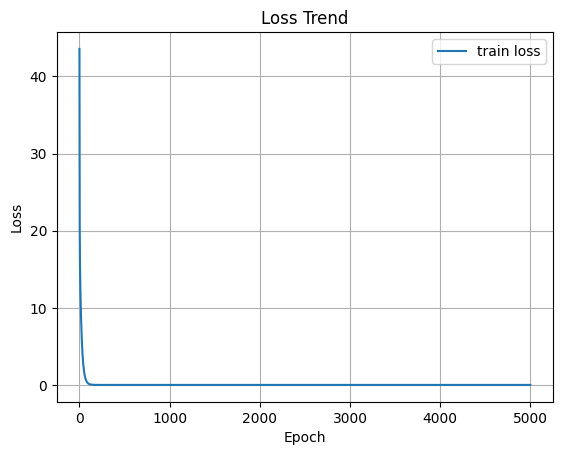

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

plt.plot(loss_list, label='train loss')
plt.legend(loc='best')
plt.show()

In [ ]:
# model parameter(Weight, Bias) 확인
for name, child in model.named_children():
  for param in child.parameters():
    print(f'{name}: {param}')

linear_stack: Parameter containing:
tensor([[ 2.0000, -3.0000,  2.0000]], requires_grad=True)
linear_stack: Parameter containing:
tensor([5.4835e-06], requires_grad=True)


# 7.예측값과 정답 비교

In [ ]:
# Test Data
x_test = torch.Tensor([ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ])

model.eval()    # evaluation mode

# 정답
label = [2 * data[0] - 3 * data[1] + 2 * data[2] for data in x_test]

# 예측
prediction = model(x_test)

print(prediction) # 예측값
print(label)      # 정답

tensor([[-5.0000],
        [-3.0000],
        [-4.0000],
        [ 9.0000],
        [ 7.0000]], grad_fn=<AddmmBackward0>)
[tensor(-5.), tensor(-3.), tensor(-4.), tensor(9.), tensor(7.)]


# Sample

- 온도, 바람, 태양광에 따른 Ozoen량을 예측

## data 준비

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

################################
# data load
training_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NeoWizard(박성호)-Pytorch/data/ozone.csv")
print(f'original training_data.shape = {training_data.shape}')
training_data.info()

################################
# 결측값(NA) 제거
training_data = training_data.dropna() # default: how="any"
print(f'결측값 처리 후 training_data.shape = {training_data.shape}')

################################
# 이상치(Outlier) 처리
zscore_threshold = 1.8 # zscore outliers 임계값 (2.0이하가 optimal)

for col in training_data.columns:
  # col별 이상치(Outlier) 확인
  outliers = training_data[col][(np.abs(stats.zscore(training_data[col])) > zscore_threshold)]
  # col별 이상치(Outlier) 제거
  training_data = training_data.loc[~training_data[col].isin(outliers)]
print(f'이상치 처리 후 training_data.shape = {training_data.shape}')

################################
# 정규화 처리(Min-Max Normalization)

x_data = training_data[['Temp', 'Wind', 'Solar.R']].values
# 1차원 array의 경우 reshape(-1, 1)을 이용 shape을 변경
t_data = training_data['Ozone'].values.reshape(-1, 1)

# MinMaxScaler 클래스의 인스턴스 생성
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

# Scaler로 data 학습
scaler_x.fit(x_data)
scaler_t.fit(t_data)

# fit()으로 학습시킨 것을 적용
x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

print(f'x_data_norm.shape = {x_data_norm.shape}, type = {type(x_data_norm)}')
print(f't_data_norm.shape = {t_data_norm.shape}, type = {type(t_data_norm)}')

original training_data.shape = (153, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
결측값 처리 후 training_data.shape = (111, 6)
이상치 처리 후 training_data.shape = (85, 6)
x_data_norm.shape = (85, 3), type = <class 'numpy.ndarray'>
t_data_norm.shape = (85, 1), type = <class 'numpy.ndarray'>


## model 정의 및 학습

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# numpy ndarray => Tensor
x_train = torch.FloatTensor(x_data_norm)
t_train = torch.FloatTensor(t_data_norm)

# model 정의
class MultiLinearRegression(nn.Module):
  def __init__(self, input_nodes):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(input_nodes, 1)
    )
  def forward(self, x):
    prediction = self.linear_stack(x)
    return prediction

model = MultiLinearRegression(x_train.shape[1]) # x_train의 col의 수 - 3

# 손실함수
criterion = nn.MSELoss()
# Optimizer
optimizer = optim.SGD(model.parameters(), 1e-2)

# 학습
loss_list = []
epochs = 2000
for epoch in range(epochs):
  model.train() # 학습 mode

  prediction = model(x_train) # 예측값
  loss = criterion(prediction, t_train) # 오차 계산

  # 오차 역전파(Back-propagation)
  optimizer.zero_grad() # 기울기 초기화
  loss.backward() # 기율기 계산
  optimizer.step() # 가중치 update

  loss_list.append(loss.item())
  if epoch % 100 == 0:
    print(f'epoch = {epoch}, current loss = {loss.item()}')

print(f'epoch = {epoch}, final loss = {loss.item()}')

epoch = 0, current loss = 0.6779773831367493
epoch = 100, current loss = 0.05978892371058464
epoch = 200, current loss = 0.048321448266506195
epoch = 300, current loss = 0.040482595562934875
epoch = 400, current loss = 0.03496691957116127
epoch = 500, current loss = 0.031084056943655014
epoch = 600, current loss = 0.028349068015813828
epoch = 700, current loss = 0.026421209797263145
epoch = 800, current loss = 0.025061046704649925
epoch = 900, current loss = 0.024100303649902344
epoch = 1000, current loss = 0.023420700803399086
epoch = 1100, current loss = 0.022939106449484825
epoch = 1200, current loss = 0.0225970596075058
epoch = 1300, current loss = 0.022353440523147583
epoch = 1400, current loss = 0.022179314866662025
epoch = 1500, current loss = 0.022054335102438927
epoch = 1600, current loss = 0.021964160725474358
epoch = 1700, current loss = 0.02189868688583374
epoch = 1800, current loss = 0.021850796416401863
epoch = 1900, current loss = 0.021815452724695206
epoch = 1999, final

## Loss 시각화

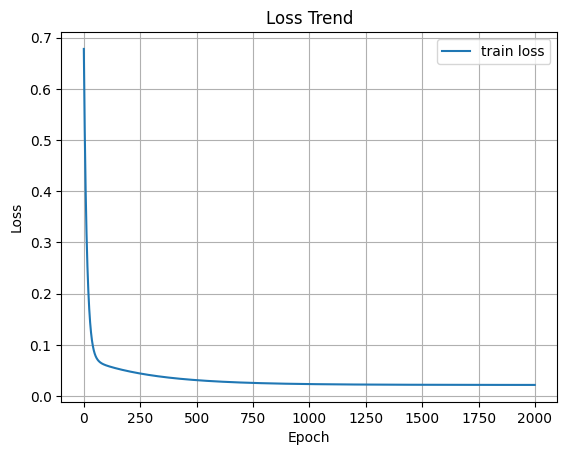

In [ ]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

plt.plot(loss_list, label='train loss')
plt.legend(loc='best')
plt.show()

## 예측

In [ ]:
# 평가
model.eval() # 평가 mode

predict_data = np.array([[150.0, 10.0, 80.0]])

# training data(x_data)를 fit()으로 학습시킨 것을 적용
predict_data_norm = scaler_x.transform(predict_data)

# numpy ndarray => Tensor
eval_data = torch.FloatTensor(predict_data_norm)

pytorch_result = model(eval_data).detach().numpy() # 기울기 계산을 비활성화
print(f'pytorch_result = {pytorch_result}')

# scaler로 변환된 data를 original data로 변환
pytorch_result = scaler_t.inverse_transform(pytorch_result.reshape(-1,1))
print(f'pytorch_result = {pytorch_result}')

pytorch_result = [[1.7711151]]
pytorch_result = [[166.40036]]
